# Project Scoping

## Problem Understanding
- Analyze data on `GDP` and `Life expectancy at birth (years)` from the World Health Organization and the World Bank to try and identify the relationship between the `GDP` and `Life expectancy at birth (years)` of six countries.
- Create a blog post to share the findings of the project.
## Goals
- To analyze the `GDP` distribution over the years
- To analyze the `Life expectancy at birth (years)` distribution over the years
- To find if there is any linear relationship between `Life expectancy at birth (years)` and `GDP`
- To compare the Life expectancy and the GDP of the six countries
## Actions - What actions or interventions will this work inform
- Create new support programs to increase `Life expectancy at birth (years)` and `GDP`
## Data
- Information about the `Life expectancy at birth (years)` and `GDP` of six countries
## Analysis
### Analysis techniques:
- Summary statistics (mean, median, the spread of the data)
- Mean bar plots
- `Life expectancy at birth (years)` histogram
- `GDP` histogram
- `GDP` - `Life expectancy at birth (years)` correlation heatmap
- `GDP` and `Life expectancy at birth (years)` box plots
- `GDP` and `Life expectancy at birth (years)` per `Country` time series 

# Needed libraries
In this project the next libraries are needed to be imported:

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Data exploring
- Find variables, number of columns, number of lines
- Check the name of the columns
- Check the null values
- Conduct summary statistics

In [122]:
data = pd.read_csv("all_data.csv")
print(data)
data.rename({"Life expectancy at birth (years)":"Life_expectancy"}, inplace = True, axis = 'columns')
print(data.head(30))
print('Dimension: ', data.shape)
print('Which are the countries that are going to be analyzed? -> ', data.Country.unique())
print('Period of time (Years):', data.Year.unique())

     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]
   Country  Year  Life_expectancy           GDP
0    Chile  2000             77.3  7.786093e+10
1    Chile  2001             77.3  7.097992e+10
2    Chile  2002             

In [123]:
print(data.info())
print("__________________________________________________")
print("__________________________________________________")
print(data.describe())
print("__________________________________________________")
print("__________________________________________________")
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
__________________________________________________
__________________________________________________
              Year  Life_expectancy           GDP
count    96.000000        96.000000  9.600000e+01
mean   2007.500000        72.789583  3.880499e+12
std       4.633971        10.672882  5.197561e+12
min    2000.000000        44.300000  4.415703e+09
25%    2003.750000        74.475000  1.733018e+11
50%    2007.500000        76.750000  1.280220e+12
75%    2011.250000        78.900000  4.067510e+12
max    2015.000000        81.000000  1.810000e+13
___

- The dataset seems to be pretty clean. There are no missing data.
- The name of the `'Life expectancy at birth (years)'` was changed in order to work easier with the data frame.
- The maximum `Life_expectancy` in these six countries over the 2000 to 2013  years was 81 years and the maximum `GDP` was   $1.8$*$10^{13}$.
- The minimum `Life_expectancy` in these six countries over the 2000 to 2013  years was 44 years and the maximum `GDP` was $4.4$*$10^{9}$.
- The mean `Life_expectancy` in these six countries over the 2000 to 2013  years was 73 years and the mean `GDP` was  $3.9$*$10^{12}$.
- Summary statistics indicate that some countries are outliers in terms of `Life_expectancy` and `GDP`.


# Data analysis using visual aids

## Bar plots
Using bar plots, information regarding the mean of the `GDP` and the `Life_expectancy` of each `Country` can be seen.

                    Country  Life_expectancy           GDP
0                     Chile         78.94375  1.697888e+11
1                     China         74.26250  4.957714e+12
2                   Germany         79.65625  3.094776e+12
3                    Mexico         75.71875  9.766506e+11
4  United States of America         78.06250  1.407500e+13
5                  Zimbabwe         50.09375  9.062580e+09


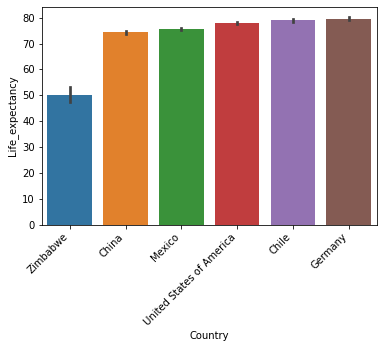

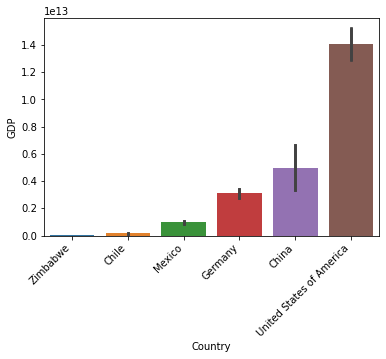

<Figure size 432x288 with 0 Axes>

In [124]:
group_by_country = data.drop(['Year'], axis=1).groupby(['Country']).mean().reset_index()
print(group_by_country)
order = group_by_country.sort_values(by=['Life_expectancy']).Country
sns.barplot(x = 'Country', y = 'Life_expectancy', data = data, order = order)
plt.xticks(rotation=45, ha='right')
order = group_by_country.sort_values(by=['GDP']).Country
plt.show()
plt.clf()
sns.barplot(x = 'Country', y = 'GDP', data = data, order = order)
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Country', y = 'GDP', data = data, order = order)
plt.show()
plt.clf()

## Histograms
The `Life_expectancy` histogram is left-skewed, while the `GDP` histogram is right-skewed. 

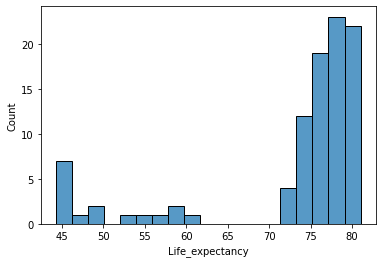

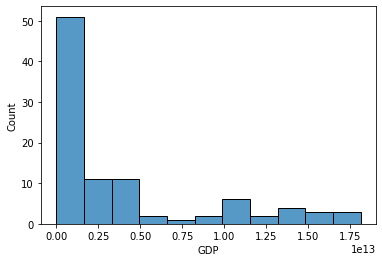

<Figure size 432x288 with 0 Axes>

In [125]:
sns.histplot(data = data, x = 'Life_expectancy')
plt.show()
plt.clf()
sns.histplot(data = data, x = 'GDP')
plt.show()
plt.clf()


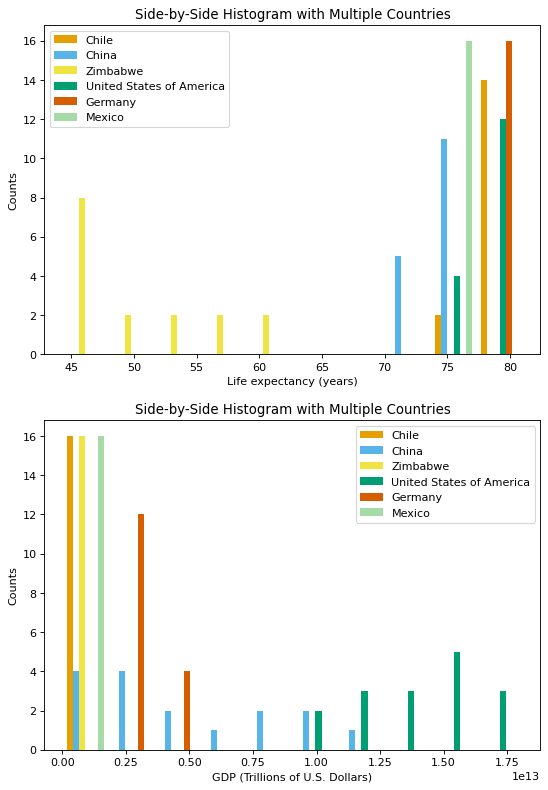

<Figure size 432x288 with 0 Axes>

In [139]:
# Assign colors for each country and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#A6DAA6']
countries = ['Chile', 'China', 'Zimbabwe', 'United States of America', 'Germany', 'Mexico']
life_expectancies = [data.Life_expectancy[data.Country == country] for country in countries]
gdps = [data.GDP[data.Country==country] for country in countries]
         
# Make the histogram using a list of lists
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), dpi=80)

ax1.hist(life_expectancies, color = colors, label = countries)
ax1.legend()
ax1.set_xlabel('Life expectancy (years)')
ax1.set_ylabel('Counts')
ax1.set_title('Side-by-Side Histogram with Multiple Countries')

ax2.hist(gdps, color = colors, label=names)
ax2.legend()
ax2.set_xlabel('GDP (Trillions of U.S. Dollars)')
ax2.set_ylabel('Counts')
ax2.set_title('Side-by-Side Histogram with Multiple Countries')

plt.show()
plt.clf()

## Box plots
Box plots help to identify in a visual manner the summary statistics (mean, 25%-50%-75% percentiles) and the outliers.
In terms of `Life_expectancy`, Zimbabwe was an outlier. People who lived there have lived fewer years. In terms of `GDP`, America was an outlier, as people who lived there have been richer.

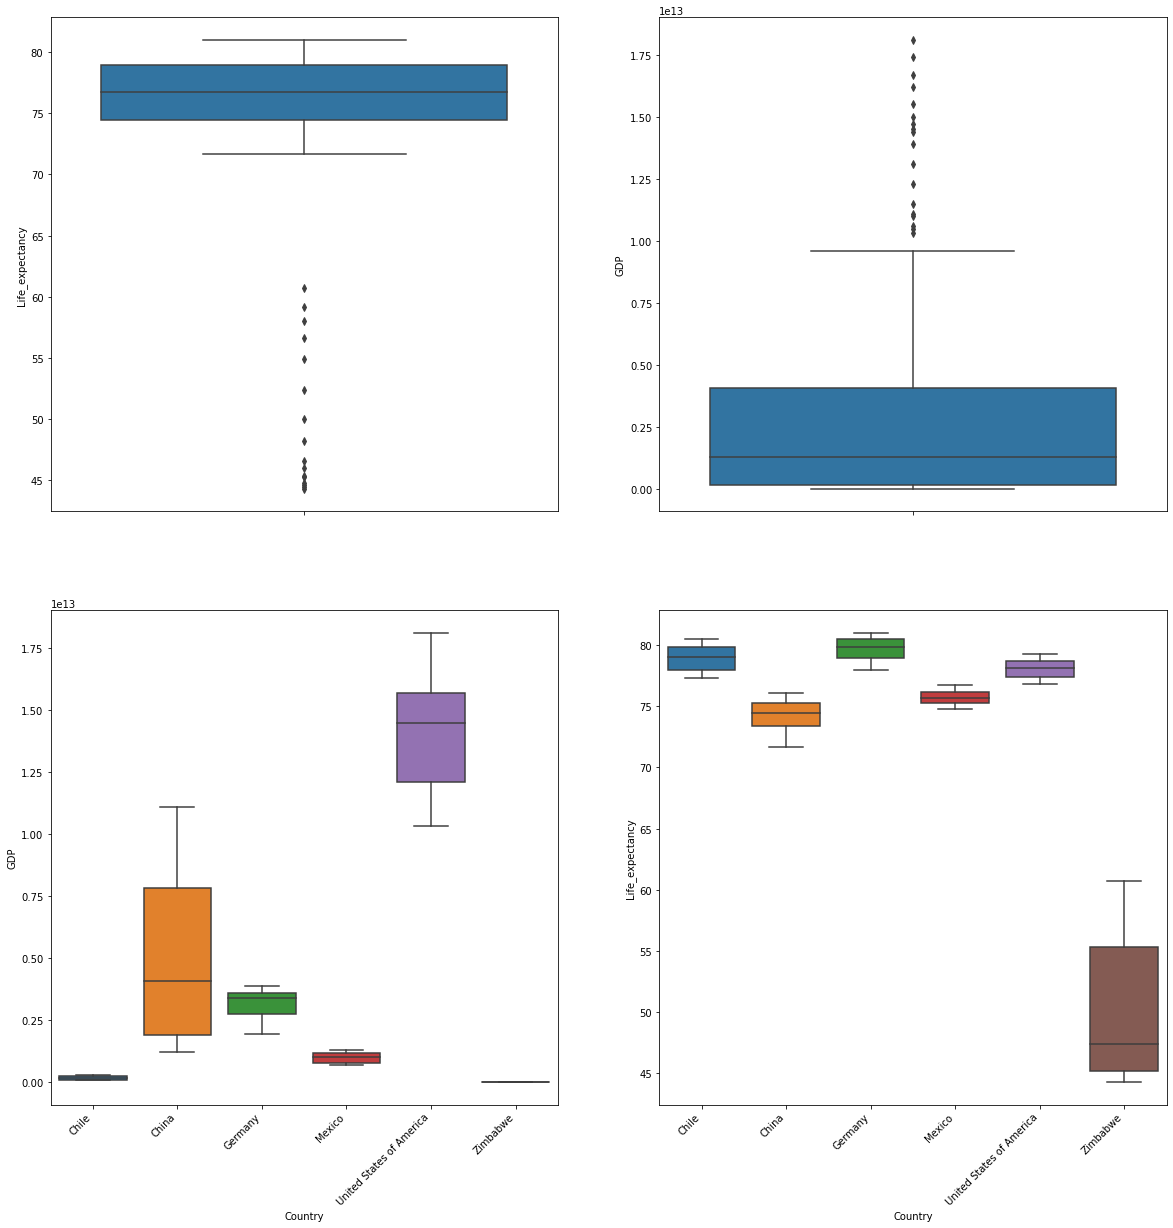

In [118]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(y='Life_expectancy', data=data)
plt.subplot(2,2,2)
sns.boxplot(y='GDP', data=data)
plt.subplot(2,2,3)
sns.boxplot(y='GDP', data=data, x = 'Country')
plt.xticks(rotation=45, ha='right')
plt.subplot(2,2,4)
sns.boxplot(y='Life_expectancy', data=data, x = 'Country')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(wspace = 0.2)
plt.show()


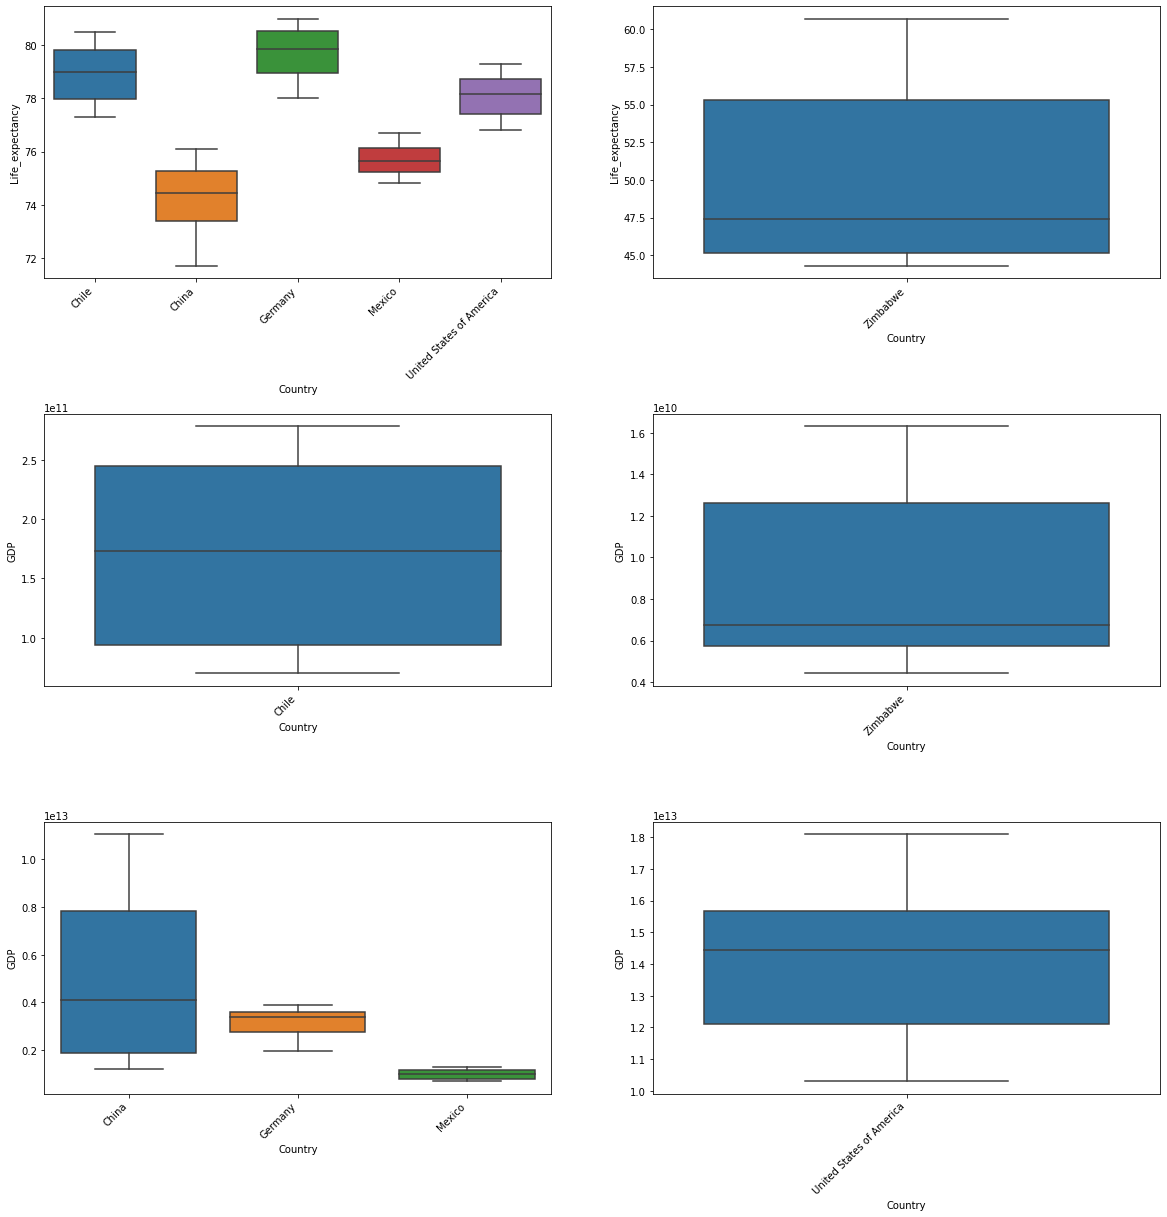

In [119]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(y='Life_expectancy', data=data[data.Country != "Zimbabwe"], x = 'Country')
plt.xticks(rotation=45, ha='right')
plt.subplot(3,2,2)
sns.boxplot(y='Life_expectancy', data=data[data.Country == "Zimbabwe"], x = 'Country')
plt.xticks(rotation=45, ha='right')
plt.subplot(3,2,3)
sns.boxplot(y='GDP', data=data[(data.Country == "Chile")], x = 'Country')
plt.xticks(rotation=45, ha='right')
plt.subplot(3,2,4)
sns.boxplot(y='GDP', data=data[(data.Country == "Zimbabwe")], x = 'Country')
plt.xticks(rotation=45, ha='right')
plt.subplot(3,2,5)
sns.boxplot(y='GDP', data=data[(data.Country == "China") | (data.Country == "Germany") | (data.Country == "Mexico")], x = 'Country')
plt.xticks(rotation=45, ha='right')
plt.subplot(3,2,6)
sns.boxplot(y='GDP', data=data[data.Country == "United States of America"], x = 'Country')
plt.xticks(rotation=45, ha='right')

plt.subplots_adjust(wspace = 0.2, hspace = 0.50)
plt.show()

##  Plotting a LOWESS (Locally Weighted Scatterplot Smoothing) 
Plotting a LOWESS (Locally Weighted Scatterplot Smoothing) smoother over the data points will draw a line through the approximate average `Life_expectancy` for each value of `GDP`. Though the individual points are more difficult to read, the line gives us information about the relationship between these two features. The data for Zimbabwe was plotted separately because of the low life expectancy data points. Both `Life_expectancy` and `GDP` have increased over the years for all countries, but `Life_expectancy` has increased especially in Zimbabwe and `GDP` has increased especially in China.

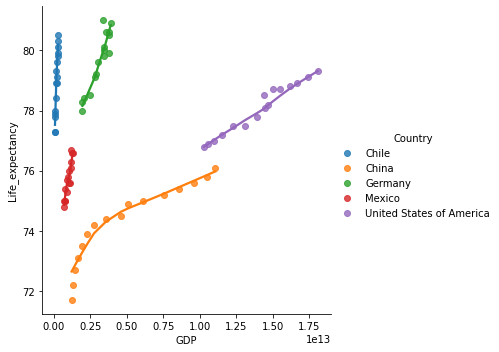

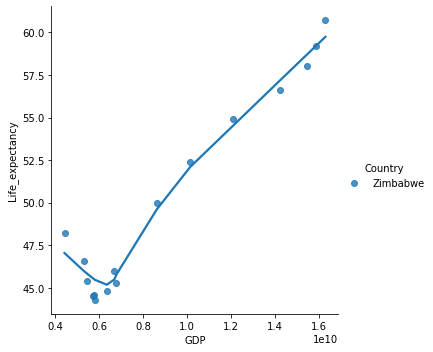

In [128]:
sns.lmplot(x='GDP', y='Life_expectancy', data = data[data.Country!='Zimbabwe'], lowess=True, hue = 'Country')
sns.lmplot(x='GDP', y='Life_expectancy', data = data[data.Country=='Zimbabwe'], lowess=True, hue = 'Country')

# Time plots
The plotted time series show the variation of the `GDP` and the `Life_expectancy` of the studied countries over the years. These plots can also indicate the `Country` with the biggest `GDP` (America) and the `Country` with the smallest life expectancy (Zimbabwe).

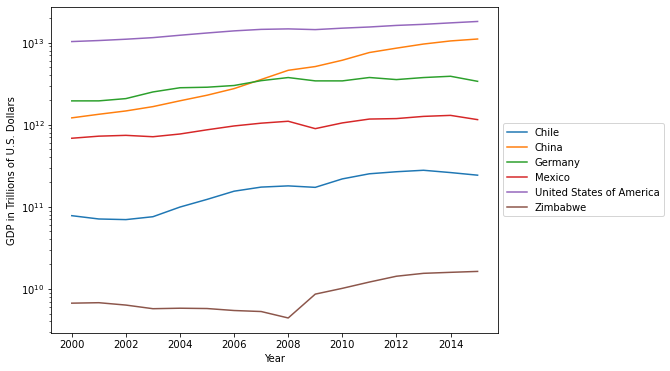

In [129]:
plt.figure(figsize=(8,6))
gf = sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
gf.set(yscale='log')
plt.ylabel("GDP in Trillions of U.S. Dollars");
plt.legend(loc='center left',  bbox_to_anchor=(1, 0.5))

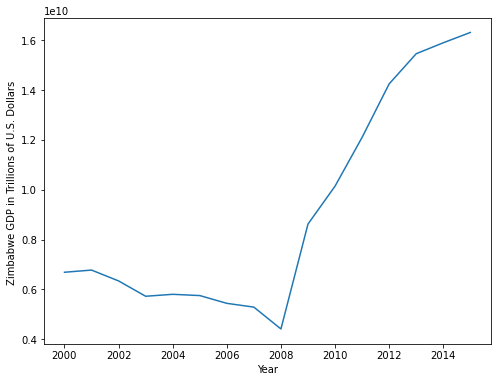

In [130]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data[data.Country == 'Zimbabwe'].GDP)
plt.ylabel("Zimbabwe GDP in Trillions of U.S. Dollars ");

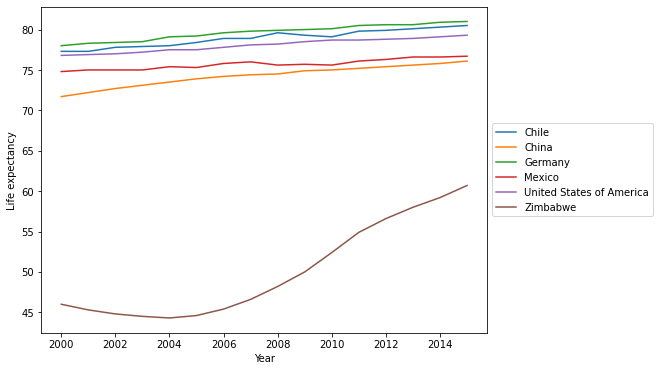

In [131]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.Life_expectancy, hue=data.Country)
plt.ylabel("Life expectancy");
plt.legend(loc='center left',  bbox_to_anchor=(1, 0.5))

# The correlation heatmap
The correlation heatmap indicates a moderate positive correlation (Pearson r correlation is somewhere around 0.4 value) between `GDP` and `Life_expectancy` in the case of the studied data set.

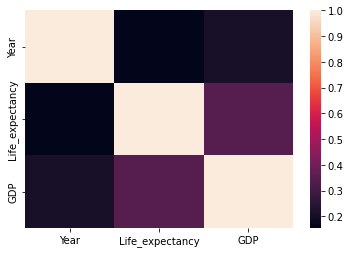

In [132]:
sns.heatmap(data.corr());

# Conclusions

- There is a moderate positive correlation (0.4) between `GDP` and `Life_expectancy` in the case of the studied data set.
- In terms of `Life_expectancy`, Zimbabwe was an outlier. People who lived there have lived fewer years. In terms of `GDP`, America was an outlier, as people who lived there have been richer.
- Both `Life_expectancy` and `GDP` have increased over the years for all countries, but `Life_expectancy` has increased especially in Zimbabwe and GDP has increased especially in China.
- `Life_expectancy` is highly influenced by `GDP` in the case of poorer countries. For medium and high-income countries `GDP` is not a relevant `Life expectancy` predictor .

Note: The conclusions apply only to the studied data set: 
- Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
- Period of time (Years): [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]